<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/modelos/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Con datos simulados
* y = a + b * x
* x : 100 valores distribuidos en una normal N(1.5, 2.5)
* Ye = 9 + 1.8 * x + e
* 'e' o 'res' : distribuido segun una normal N(0, 0.8)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = 1.5 + 2.5 * np.random.randn(100)
res = 0 + 0.8 * np.random.randn(100)
y_pred = 9 + 1.8 * x
y_act = 9 + 1.8 * x + res

In [ ]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [ ]:
data = pd.DataFrame({
    'x': x_list,
    'y': y_act_list,
    'y_pred': y_pred_list
})

In [ ]:
data.head()

,x,y,y_pred
0,1.509191,12.064949,11.716543
1,2.301537,12.357441,13.142767
2,-0.500333,7.973843,8.099401
3,2.217686,15.010395,12.991835
4,3.336773,15.309324,15.006192


In [ ]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list ) +1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

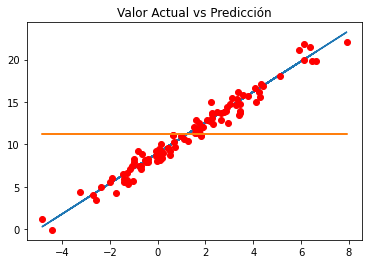

In [ ]:
%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, 'ro')
plt.plot(x, y_mean)
plt.title('Valor Actual vs Predicción')

In [ ]:
data['SSR'] =  (data['y_pred'] - np.mean(y_act)) **2
data['SSD'] = (data['y_pred'] - data['y']) **2
data['SST'] = (data['y'] - np.mean(y_act)) ** 2

In [ ]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,1.509191,12.064949,11.716543,0.242003,0.121387,0.706179
1,2.301537,12.357441,13.142767,3.679344,0.616737,1.283316
2,-0.500333,7.973843,8.099401,9.766901,0.015765,10.567456
3,2.217686,15.010395,12.991835,3.123100,4.074588,14.332209
4,3.336773,15.309324,15.006192,14.300398,0.091889,16.684929


In [ ]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])
R2 = SSR/SST
print(f'SSR: {SSR}\nSSD: {SSD}\nSST: {SST}')
print(f'SSR + SSD = SST: {SSR + SSD}')
print(f'R2: {R2}')

SSR: 2001.3940468051221
SSD: 66.51399812503371
SST: 2051.944696543567
SSR + SSD = SST: 2067.908044930156
R2: 0.9753645164883851


(array([ 3.,  1.,  9.,  4., 19., 18., 19., 11.,  9.,  7.]),
 array([-2.01856086, -1.6450851 , -1.27160934, -0.89813358, -0.52465782,
        -0.15118206,  0.22229369,  0.59576945,  0.96924521,  1.34272097,
         1.71619673]),
 <a list of 10 Patch objects>)

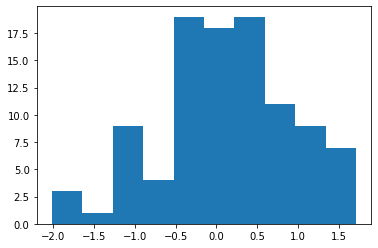

In [ ]:
plt.hist(data['y_pred'] - data['y'])

## Obteniendo la recta de regresión
* y = a + b * x
* b = sum(xi - x_m) * (y_i - y_m) / sum((xi - x_m)^2)
* a = y_m - b * x_m

* $y_e = \alpha + \beta x$
* $\beta = \sum((xi - x_m)*(y_i - y_m)) / \sum((xi - x_m)^2)$
* $\alpha = y_n - \beta*x_m$

In [ ]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y'])
x_mean, y_mean

(1.3094112255705974, 11.224605020749452)

In [ ]:
# covarianza
data['beta_n'] = (data['x']-x_mean) * (data['y']-y_mean)
# varianza de x
data['beta_d'] = (data['x']-x_mean) **2

# b = sum(xi - x_m) * (y_i - y_m) / sum((xi - x_m)^2)
beta = sum(data['beta_n']) / sum(data['beta_d'])

In [ ]:
# a = y_m - b * x_m
alpha = y_mean - beta * x_mean

In [ ]:
alpha, beta

(8.875008483057865, 1.7943916256466423)

El modelo lineal obtenido por regresion es y = 8.997183998508735 + 1.7837733731272416 * x

In [ ]:
data['y_model'] = alpha + beta * data['x']

In [ ]:
data.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.509191,12.064949,11.716543,0.242003,0.121387,0.706179,0.167883,0.039912,11.583087
1,2.301537,12.357441,13.142767,3.679344,0.616737,1.283316,1.123915,0.984314,13.004867
2,-0.500333,7.973843,8.099401,9.766901,0.015765,10.567456,5.883048,3.275174,7.977215
3,2.217686,15.010395,12.991835,3.123100,4.074588,14.332209,3.438538,0.824963,12.854405
4,3.336773,15.309324,15.006192,14.300398,0.091889,16.684929,8.281204,4.110196,14.862486


In [ ]:
SSR = sum((data['y_model']- y_mean) **2)
SSD = sum((data['y_model'] - data['y']) **2)
SST = sum((data['y'] - y_mean) **2)
R2 = SSR/SST
y_mean = [np.mean(y_act) for i in range(1, len(x_list ) +1)]
print(f'SSR: {SSR}\nSSD: {SSD}\nSST: {SST}')
print(f'SSR + SSD = SST: {SSR + SSD}')
print(f'R2: {R2}')

SSR: 1987.2013710417045
SSD: 64.7433255018628
SST: 2051.944696543567
SSR + SSD = SST: 2051.9446965435673
R2: 0.9684478214198851


Text(0.5, 1.0, 'Valor Actual vs Predicción')

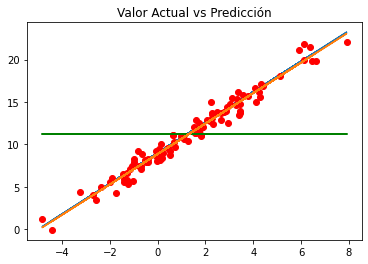

In [ ]:
%matplotlib inline
plt.plot(data['x'], data['y_pred'])
plt.plot(data['x'], data['y'], 'ro')
plt.plot(data['x'], y_mean, 'g')
plt.plot(data['x'], data['y_model'])
plt.title('Valor Actual vs Predicción')


RSE: Error Estándar de los residuos


In [ ]:
RSE = np.sqrt(SSD / (len(data) -2))
RSE

0.8128014386001274

In [ ]:
np.mean(data['y'])

11.224605020749452

In [ ]:
RSE / 11.17142868912199

0.07275716125651686

## Regresión lineal simple en Python
### el paquete statsmodel para regresión lineal

In [ ]:
data = pd.read_csv('/content/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# predecir ventas en función de TV
lm = smf.ols(formula='Sales ~ TV', data=data).fit()
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo
* Sales = 7.032594 + 0.047537 * TV 

In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.47e-42
Time:                        05:30:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

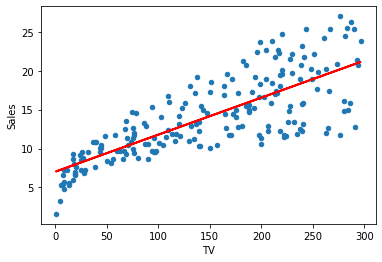

In [ ]:
data.plot(kind = 'scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c='red', linewidth=2)

In [ ]:
data['sales_pred'] = 7.032594 + 0.047537  * data['TV']

In [ ]:
# residual squuare error
data['RSE'] =  (data['Sales'] - data['sales_pred']) **2

In [ ]:
SSD = sum(data['RSE'])
RSE = np.sqrt(SSD/ len(data)-2)

In [ ]:
print(f'SSD: {SSD}')
print(f'RSE: {RSE}')

SSD: 2102.5305838896525
RSE: 2.917645098268167


In [ ]:
sales_m = np.mean(data['Sales'])
sales_m

14.0225

In [ ]:
error = RSE / sales_m
error

0.20806882497900994

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

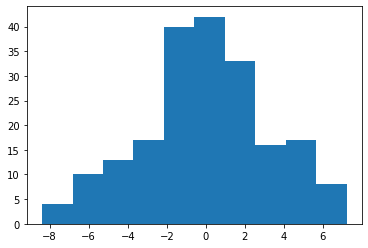

In [ ]:
plt.hist(data['Sales'] - data['sales_pred'])

Regresión lineal múltiple
* statsmodel

In [ ]:
# añadir el newspaper al modelo existente
lm2 = smf.ols(formula='Sales ~ TV + Newspaper', data=data).fit()

In [ ]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [ ]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.507584 + 0.046901 TV + 0.044219 Newspaper

In [ ]:
# valores r^2 y r^2 ajustado
lm2.rsquared

0.6458354938293271

In [ ]:
lm2.rsquared_adj

0.6422399150864777

In [ ]:
# predicciones
sales_pred = lm2.predict(data[['TV', 'Newspaper']])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [ ]:
# desviacion estandar
# RSE: Error Estándar de los residuos
SSD  = sum((data['Sales']- sales_pred) ** 2)
# menos el numero de variables predictoras - 1
# usamos 2 queda (-2 -1) = (-3)
RSE = np.sqrt(SSD / (len(data)-2 -1))
RSE

3.120719860252885

In [ ]:
error = RSE / sales_m
error

0.2225508903728212

In [ ]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           3.95e-45
Time:                        05:30:44   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm3 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.83e-98
Time:                        05:30:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm3.predict(data[['TV', 'Radio']])
SSD = sum((data['Sales']-sales_pred) **2)
RSE = np.sqrt(SSD / (len(data) -2 -1))

In [ ]:
RSE

1.6813609125080011

In [ ]:
RSE / sales_m

0.11990450436855062

In [ ]:
lm4 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.58e-96
Time:                        05:30:45   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm4.predict(data[['TV', 'Radio',  'Newspaper']])
SSD = sum((data['Sales'] - sales_pred) **2)
RSE = np.sqrt(SSD / (len(data)-3 -1))
RSE

1.6855103734147436

In [ ]:
RSE / sales_m

0.12020041885646236

## Multicolinealidad
###  Factor inflación de la varianza
* VIF = 1: Las variables no estan correlacionadas
* VIF < 5: Las variables tiene una correlacion moderada y se pueden quedar en el modelo
* VIF > 5: Las variables estan altamente coffelacionadas y deben desaparecer del modelo

In [ ]:
# Newspaper - TV + Radio  -->> VIF = 1/(1-R^2)
lm_n = smf.ols(formula='Newspaper ~ TV + Radio', data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/ (1-rsquared_n)
VIF

1.1451873787239288

In [ ]:
# TV - Newspaper + Radio  -->> VIF = 1/(1-R^2)
lm_tv = smf.ols(formula='TV ~ Newspaper + Radio', data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1 / (1-rsquared_tv)
VIF

1.00461078493965

In [ ]:
# Radio - Newspaper + TV  -->> VIF = 1/(1-R^2)
lm_r = smf.ols(formula='Radio ~ TV + Newspaper', data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1 / (1-rsquared_r)
VIF

1.1449519171055353

smf: stats model formula

ols: ordinary least squares

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.83e-98
Time:                        05:30:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dividir el dataset en conjunto de entrenamiento y de testing

In [ ]:
data2 = pd.read_csv('/content/Advertising.csv')
data2.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
a = np.random.randn(len(data2))

(array([ 6., 13., 16., 37., 31., 35., 33., 19.,  8.,  2.]),
 array([-2.34684656, -1.86032351, -1.37380047, -0.88727742, -0.40075438,
         0.08576867,  0.57229171,  1.05881476,  1.5453378 ,  2.03186085,
         2.51838389]),
 <a list of 10 Patch objects>)

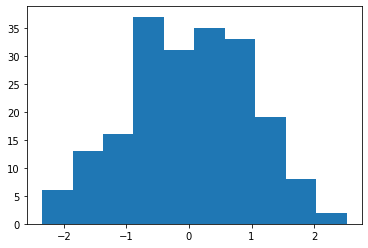

In [ ]:
plt.hist(a)

In [ ]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [ ]:
len(training), len(testing), len(data)

(151, 49, 200)

In [ ]:
#import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV + Radio', data=training).fit()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     702.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.90e-76
Time:                        05:30:45   Log-Likelihood:                -293.42
No. Observations:                 151   AIC:                             592.8
Df Residuals:                     148   BIC:                             601.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8256      0.333      8.486      0.000       2.168       3.484
TV             0.0465      0.002     29.381      0.000       0.043       0.050
Radio          0.1875      0.009     20.281      0.000       0.169       0.206
==============================================================================
Omnibus:                       48.685   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.514
Skew:                          -1.337   Prob(JB):                     1.12e-26
Kurtosis:                       6.442   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def impr():
  print("Ventas = "+str(lm.params["Intercept"])+" + "+str(lm.params["TV"])+"*TV "+" + "+str(lm.params["Radio"])+"*Radio")

## Validacion del modelo con el conunto de testing

In [ ]:
# predecir los valores de ventas de esas variables
sales_pred = lm.predict(testing)
sales_pred

5      12.396175
6      11.645859
7      12.085056
16     12.836791
19     14.150375
22      6.419414
41     17.311254
49      8.127453
51      9.290485
52     20.697932
55     21.328111
59     18.146168
63     13.146371
67     12.016597
68     19.011962
71     10.608301
76      4.403365
80     11.380656
82     10.129858
83     14.345531
85     15.252278
86     11.525970
87     15.580070
92     19.221246
96     12.663725
109    19.735916
114    15.232053
115    12.876087
116    11.974460
117     6.525689
125     9.089498
132     8.314559
133    19.318829
152    16.375245
154    15.507467
157    10.030164
162    14.972997
164    11.027144
165    14.359649
167    13.409896
169    18.023398
177    12.196539
178    16.114402
183    24.250138
184    18.611844
186     9.701504
188    18.720980
194    16.455069
197    12.793697
dtype: float64

In [ ]:
SSD = sum((testing['Sales']-sales_pred)**2)
SSD

126.82156900461828

In [ ]:
RSE = np.sqrt(SSD / (len(testing)-2 -1))
RSE

1.6604188117867071

In [ ]:
sales_mean = np.mean(testing['Sales'])
error = RSE / sales_mean
error

0.1196478261434539

## Regresión lineal en Python
### Con scikit-learn

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
data = pd.read_csv('/content/Advertising.csv')
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
Y = data['Sales']

In [ ]:
estimator = SVR(kernel='linear')
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X, Y)

In [ ]:
# feature_cols = ['TV', 'Radio', 'Newspaper']
selector.support_

array([ True,  True, False])

In [ ]:
selector.ranking_

array([1, 1, 2])

In [ ]:
from sklearn.linear_model import LinearRegression

X_pred = X[['TV', 'Radio']]

lm = LinearRegression().fit(X_pred, Y)

print(f'-LINEAR MODEL-\nIntercept: {lm.intercept_}\nCoef: {lm.coef_}\nScore: {lm.score(X_pred, Y)}')


-LINEAR MODEL-
Intercept: 2.9210999124051362
Coef: [0.04575482 0.18799423]
Score: 0.8971942610828957


## Tratamiento de variables categoricas

In [ ]:
# from sklearn.linear_model import LinearRegression
# import pandas as pd
# import numpy as np

In [ ]:
df =  pd.read_csv('/content/Ecom Expense.csv')
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [ ]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City')

In [ ]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [ ]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [ ]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [ ]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Female', 'Gender_Male', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']

In [ ]:
lm = LinearRegression().fit(X, Y)
print(f'-LINEAR MODEL-\nIntercept: {lm.intercept_}\nCoef: {lm.coef_}\nScore: {lm.score(X,Y)}')

-LINEAR MODEL-
Intercept: -79.41713030137271
Coef: [ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]
Score: 0.9179923586131016


In [ ]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589526),
 ('Gender_Female', -131.02501325554573),
 ('Gender_Male', 131.02501325554587),
 ('City_Tier 1', 76.76432601049483),
 ('City_Tier 2', 55.13897430923282),
 ('City_Tier 3', -131.90330031972766),
 ('Record', 772.2334457445643)]

El modelo puede ser escrito como:
  Total_Spend = cada feature_cols * lm.coef + la siguiente tupla ... y asi.

In [ ]:
df_new['prediction'] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [ ]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [ ]:
# Suma de los cuadrados de las diferencias
SSD = np.sum((df_new['prediction'] - df_new['Total Spend']) ** 2)
# Desviacion tipica de los residuos
RSE = np.sqrt(SSD / (len(df_new)- len(feature_cols)-1 ))
sales_mean = np.mean(df_new['Total Spend'])
error = 100 * (RSE / sales_mean)

print(f'SSD: {SSD}\nRSE: {RSE}\nSales Mean: {sales_mean}\nError:{error} %')

SSD: 1517733985.3408165
RSE: 803.1318809818166
Sales Mean: 6163.176415976715
Error:13.03113568029416 %


In [ ]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:, 1:]
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City').iloc[:, 1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [ ]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)

column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [ ]:
feature_cols = ['Monthly Income', 'Transaction Time', 'Gender_Male', 'City_Tier 2', 'City_Tier 3', 'Record']
X = df_new[feature_cols]
Y = df_new['Total Spend']
lm = LinearRegression().fit(X, Y)

print(f'-LINEAR MODEL-\nIntercept: {lm.intercept_}\nCoef: {lm.coef_}\nScore: {lm.score(X,Y)}')

print(list(zip(feature_cols, lm.coef_)))

df_new['prediction'] = lm.predict(pd.DataFrame(df_new[feature_cols]))

# Suma de los cuadrados de las diferencias
SSD = np.sum((df_new['prediction'] - df_new['Total Spend']) ** 2)
# Desviacion tipica de los residuos
RSE = np.sqrt(SSD / (len(df_new)- len(feature_cols)-1 ))
sales_mean = np.mean(df_new['Total Spend'])
error = 100 * (RSE / sales_mean)

print(f'SSD: {SSD}\nRSE: {RSE}\nSales Mean: {sales_mean}\nError:{error} %')


-LINEAR MODEL-
Intercept: -133.67781754642238
Coef: [ 1.47538980e-01  1.54946125e-01  2.62050027e+02 -2.16253517e+01
 -2.08667626e+02  7.72233446e+02]
Score: 0.9179923586131016
[('Monthly Income', 0.14753898049205752), ('Transaction Time', 0.1549461254958957), ('Gender_Male', 262.05002651109413), ('City_Tier 2', -21.625351701262886), ('City_Tier 3', -208.6676263302229), ('Record', 772.2334457445638)]


Transformación de variables para conseguir una relación no lineal

In [ ]:
import pandas as pd

In [ ]:
data_auto = pd.read_csv('/content/auto-mpg.csv')
data_auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


Text(0.5, 1.0, 'CV vs MPG')

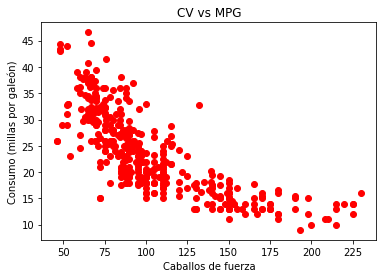

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto['horsepower'] = data_auto['horsepower'].dropna()

plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de fuerza')
plt.ylabel('Consumo (millas por galeón)')
plt.title('CV vs MPG')

### Modelo de regresión lineal
* mpg = a + b * horsepower

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
X_data  = X[:, np.newaxis]
lm = LinearRegression()
lm.fit(X_data, Y)

<ipython-input-15-367aa314463e>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data  = X[:, np.newaxis]


LinearRegression()

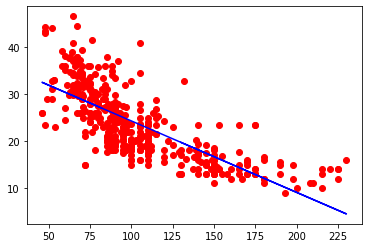

In [ ]:
%matplotlib inline

plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X_data), color='blue')

In [ ]:
lm.score(X_data, Y)

0.5746533406450252

In [ ]:
SSD = np.sum((Y - lm.predict(X_data)) **2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean

print(f'SSD: {SSD}\nRSE: {RSE}\ny_mean: {y_mean}\nerror: {error}')

SSD: 10315.751960060918
RSE: 5.046879480825511
y_mean: 23.514572864321607
error: 0.21462773361633472


### Modelo de regresión cuadrático
* mpg = a + b * horsepower ^ 2

In [ ]:
X_data = X**2
X_data = X_data[:, np.newaxis]

lm = LinearRegression()
lm.fit(X_data, Y)

<ipython-input-23-ef3e2e167a43>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:, np.newaxis]


LinearRegression()

In [ ]:
lm.score(X_data, Y)

0.4849887034823205

In [ ]:
SSD = np.sum((Y - lm.predict(X_data)) **2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(Y)
error = RSE / y_mean

print(f'SSD: {SSD}\nRSE: {RSE}\ny_mean: {y_mean}\nerror: {error}')

SSD: 12490.350340501926
RSE: 5.553410772769817
y_mean: 23.514572864321607
error: 0.23616889852998113


### Modelo de regresión lineal y cuadrático
* mpg = a + b *horsepower *+ x *horsepower*^ 2

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
poly = PolynomialFeatures(degree=2)
X_data = poly.fit_transform(X[:, np.newaxis])

<ipython-input-28-a237af516274>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])


In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [ ]:
lm.score(X_data, Y)

0.6439066584257469

In [ ]:
lm.intercept_

55.026192447081144

In [ ]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - -0.43 hp + 0.00112615 hp ^ 2

In [ ]:
for d in range(2,6):
  poly = PolynomialFeatures(degree=d)
  X_data = poly.fit_transform(X[:, np.newaxis])
  lm = linear_model.LinearRegression()
  lm.fit(X_data, Y)
  print('=' * 30)
  print(f'Regresión de grado {d} :')
  print(lm.score(X_data, Y))
  print(f'Intercept {lm.intercept_}')
  print(f'Coef {lm.coef_}')
  print(regresion_validation(lm, X_data, Y))

Regresión de grado 2 :
0.6439066584257469
Intercept 55.026192447081144
Coef [ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502
RSE: 4.61778115803654
y_mean: 23.514572864321607
error: 0.196379546619069
None
Regresión de grado 3 :
0.6444678885560744
Intercept 58.44877411148572
Coef [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855
RSE: 4.614140736300908
y_mean: 23.514572864321607
error: 0.19622473106036686
None
Regresión de grado 4 :
0.6467674189704502
Intercept 40.096643848808654
Coef [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.799832491351
RSE: 4.599194731579757
y_mean: 23.514572864321607
error: 0.19558912501268785
None
Regresión de grado 5 :
0.6547512491371934
Intercept -40.69402885502241
Coef [ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388773775
RSE: 4.546921734122058
y_mean: 23.514572864321607
error: 0.1933661206757895
N

<ipython-input-44-59d540d8ece4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-44-59d540d8ece4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-44-59d540d8ece4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-44-59d540d8ece4>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexi

In [ ]:
def regresion_validation(lm, X_data, Y):
  SSD = np.sum((Y - lm.predict(X_data)) **2)
  RSE = np.sqrt(SSD / (len(X_data)-1))
  y_mean = np.mean(Y)
  error = RSE / y_mean

  print(f'SSD: {SSD}\nRSE: {RSE}\ny_mean: {y_mean}\nerror: {error}')

In [ ]:
def regresion_validation2(X_data, Y, Y_pred):
  SSD = np.sum((Y - Y_pred )**2)
  RSE = np.sqrt(SSD / (len(X_data)-1))
  y_mean = np.mean(Y)
  error = RSE / y_mean

  print(f'SSD: {SSD}\nRSE: {RSE}\ny_mean: {y_mean}\nerror: {error}')

for d in range(2,6):
  poly = PolynomialFeatures(degree=d)
  X_data = poly.fit_transform(X[:, np.newaxis])
  lm = linear_model.LinearRegression()
  lm.fit(X_data, Y)
  print('=' * 30)
  print(f'Regresión de grado {d} :')
  print(lm.score(X_data, Y))
  print(f'Intercept {lm.intercept_}')
  print(f'Coef {lm.coef_}')
  print(regresion_validation2(X_data, Y, lm.predict(X_data)))

Regresión de grado 2 :
0.6439066584257469
Intercept 55.026192447081144
Coef [ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502
RSE: 4.61778115803654
y_mean: 23.514572864321607
error: 0.196379546619069
None
Regresión de grado 3 :
0.6444678885560744
Intercept 58.44877411148572
Coef [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855
RSE: 4.614140736300908
y_mean: 23.514572864321607
error: 0.19622473106036686
None
Regresión de grado 4 :
0.6467674189704502
Intercept 40.096643848808654
Coef [ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.799832491351
RSE: 4.599194731579757
y_mean: 23.514572864321607
error: 0.19558912501268785
None
Regresión de grado 5 :
0.6547512491371934
Intercept -40.69402885502241
Coef [ 0.00000000e+00  4.00021894e+00 -7.54802468e-02  6.19621641e-04
 -2.36220984e-06  3.41983153e-09]
SSD: 8373.171388773775
RSE: 4.546921734122058
y_mean: 23.514572864321607
error: 0.1933661206757895
N

<ipython-input-48-70560e866fd8>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-48-70560e866fd8>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-48-70560e866fd8>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:, np.newaxis])
<ipython-input-48-70560e866fd8>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before in

El problema de los outliers

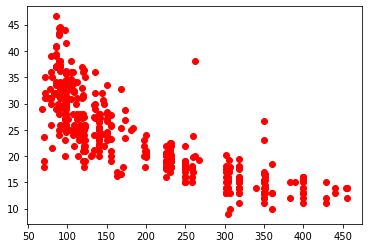

In [ ]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')

In [ ]:
X = data_auto['displacement'].fillna(data_auto['displacement'].mean())
X = X.values.reshape(-1,1)
Y = data_auto['mpg'].fillna(data_auto['mpg'].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [ ]:
lm.score(X, Y)

0.6261049762826918

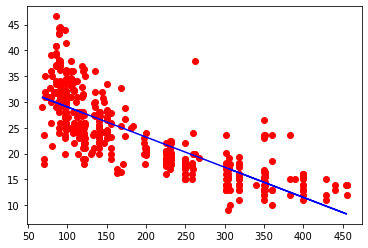

In [ ]:
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X), color='blue')

In [ ]:
data_auto[(data_auto['displacement']>250)&(data_auto['mpg']> 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [ ]:
data_auto[(data_auto['displacement']>300)&(data_auto['mpg']> 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [ ]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])

In [ ]:
X = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
X = X.values.reshape(-1,1)
Y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [ ]:
lm.score(X, Y)

0.6466514317531822

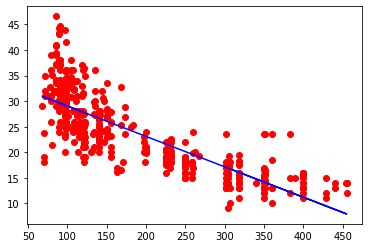

In [ ]:
plt.plot(X, Y, 'ro')
plt.plot(X, lm.predict(X), color='blue')

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
            header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


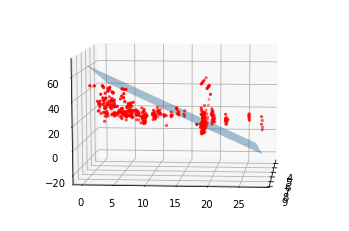

In [ ]:
# Análisis de resultados
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np

x1_range = np.arange(df['RM'].min(), df['RM'].max())
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max())

X1, X2 = np.meshgrid(x1_range, x2_range)

plano = pd.DataFrame({'RM': X1.ravel(), 'INDUS': X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, pred, alpha=0.4)

ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='R', marker='.')
ax.view_init(elev=10, azim=5)
plt.show()

In [ ]:
num_rooms_std = sc_x.transform(np.array([5.0, 3.0]).reshape(1,-1))
price_std = slr.predict(num_rooms_std)
print("El precio de una casa con 5 habitaciones y 3 indus en Boston es de: ")
print(' %.3f miles de pesos'%
      sc_y.inverse_transform(price_std))

El precio de una casa con 5 habitaciones y 3 indus en Boston es de: 
 15.208 miles de pesos
